In [1]:
import asammdf
import numpy as np
import py
import get_files
import uuid
%matplotlib inline

In [2]:
def sine(t, A=1, f=1):
    sine_ = A*np.sin(
        2 * np.pi * f * t
    )
    return sine_

def _path(self):
    return py.path.local(self._file.name)

def __repr__(self):
    return "MDF<{}, v={}>".format(self._path.basename, self.version)

extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

In [3]:
buffer_time = 5 # seconds

In [4]:
t0=np.arange(0, buffer_time, 1e-3, dtype=np.float32)

In [5]:
Signal = asammdf.Signal

In [25]:
signals = list()

signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)

In [26]:
signals = [signal0]

In [27]:
mdf = MDF2(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst="log_data",
    overwrite=True,
    compression=2,
)
print(o)

log_data.mf4


In [37]:
class SignalBuffer():
    def __init__(self, buffer=100):
        self.buffer = buffer
        self.index=0
        self.uuid=uuid.uuid4()
        self.timestamps=np.zeros([self.buffer])
        self.samples=np.zeros([self.buffer])
        
    def append(self, timestamp, sample):
        try:
            self.timestamps[self.index] = timestamp
            self.samples[self.index] = sample
            self.index+=1
        except:
            raise
            
    @property
    def _signal(self):
        signal_ = asammdf.Signal(
            timestamps=self.timestamps,
            samples=self.samples,
            name=self.uuid,
            unit="",
            comment="buffer"
        )
        return signal_
            
    @property
    def _free(self):
        return self.buffer-self.index
        
    def __repr__(self):
        return "SignalBuffer<free={}>".format(self._free)

In [38]:
sine_buffer = SignalBuffer()

In [39]:
t1=np.arange(buffer_time, 2*buffer_time, 1e-3, dtype=np.float32)

In [40]:
for t in t1:
    sine_buffer.append(t, sine(t))

IndexError: index 100 is out of bounds for axis 0 with size 100

In [41]:
sine_buffer = SignalBuffer()
for t in t1:
    sine_buffer.append(t, sine(t))
    if sine_buffer._free<1:
        break
sine_buffer._free

0

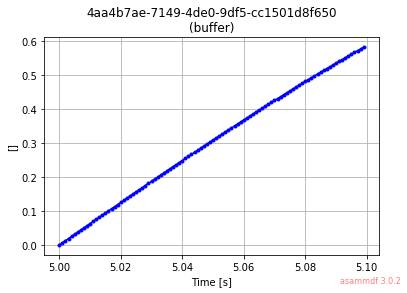

In [43]:
sine_buffer._signal.plot()

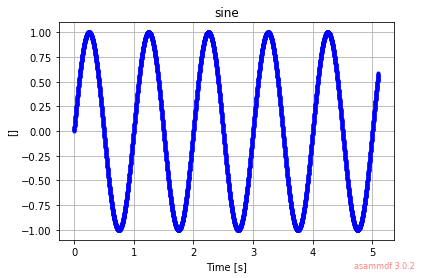

In [46]:
signal0.extend(sine_buffer._signal).plot()

In [47]:
# Bootstrap time
t0=np.arange(0, buffer_time, 1e-3, dtype=np.float32)
# Faux Time
t1=np.arange(buffer_time, 2*buffer_time, 1e-3, dtype=np.float32)

In [48]:
signals = list()

signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)

sine_buffer = SignalBuffer()
for t in t1:
    sine_buffer.append(t, sine(t))
    if sine_buffer._free<1:
        break
sine_buffer._free

0

In [51]:
signals = [
    signal0
]
mdf = MDF2(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst="log_data",
    overwrite=True,
    compression=2,
)
print(o)

log_data.mf4


In [53]:
signals = [
    signal0
]
mdf = MDF2(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)

idx=0

o = mdf.save(
    dst="log_data_{}".format(idx),
    overwrite=True,
    compression=2,
)

print(o)

log_data_0.mf4


In [64]:
idx=0

signalX = signal0
sine_buffer = SignalBuffer()
for t in t1:
    if sine_buffer._free<1:
        signalX = signalX.extend(sine_buffer._signal)
        
        signals = [
            signalX
        ]
        mdf = MDF2(
            version='4.11',
        )
        signals
        mdf.append(
            signals=signals,
            common_timebase=False,
        )

        o = mdf.save(
            dst="log_data_{}".format(idx),
            overwrite=True,
            compression=2,
        )
        idx+=1
        sine_buffer = SignalBuffer()
    
    sine_buffer.append(t, sine(t))


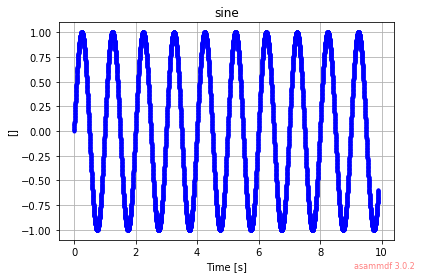

In [65]:
signalX.plot()